In [1]:
import numpy as np

from __future__ import print_function
from sklearn import metrics

import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm


In [33]:
truth_path = 'data_v2/dev.iob2'
prediction_path = 'binary_dev_pred.iob2'


In [34]:
labels = ['E', 'O']

In [35]:
with open(truth_path) as f:
    truth = f.readlines()
with open(prediction_path) as f:
    prediction = f.readlines()

In [36]:
len(prediction), len(truth)

(71255, 71255)

In [37]:
words = {}

truth_labels = []
pred_labels = []

for t,p in zip(truth, prediction):
    if len(t) != 1:
        tw, tl = t[:-1].split(' ')
        pw, pl = p[:-1].split(' ')
        if tw != pw:
            print("ERROR!!!", tw, pw)
        if tw not in words:
            words[tw] = {"truth":[],"pred":[]}
        words[tw]["truth"].append(labels.index(tl if tl == 'O' else 'E'))
        words[tw]["pred"].append(labels.index(pl))
        truth_labels.append(labels.index(tl if tl == 'O' else 'E'))#  < 13)
        pred_labels.append(labels.index(pl))#  < 13)

truth_labels = np.array(truth_labels)
pred_labels = np.array(pred_labels)    

In [38]:
freq_words = {k:a for k,a in words.items() if len(a['truth']) > 20}

In [39]:
cm = metrics.confusion_matrix(truth_labels, pred_labels, labels=range(len(labels)))

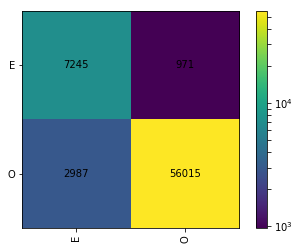

In [40]:
# plt.imshow(np.log(cm))
plt.imshow(cm, norm=LogNorm())
for (j,i),label in np.ndenumerate(cm):
    plt.text(i,j,label,ha='center',va='center')
plt.xticks(range(len(labels)), labels, rotation=90)
plt.yticks(range(len(labels)), labels)
plt.colorbar();

In [41]:
p = metrics.precision_score(truth_labels, pred_labels, labels=range(2), average=None)

r = metrics.recall_score(truth_labels, pred_labels, labels=range(2), average=None)

f1 = metrics.f1_score(truth_labels, pred_labels, labels=range(2), average=None)

In [42]:
print("Accuracy: {:.2f}% \n".format(100 * metrics.accuracy_score(truth_labels, pred_labels)))

print("{:10s} \t Precision \t Recall \t F-score".format('Name'))
for name, pp,rr,ff in zip(labels, p,r,f1):
    print("{:10s} \t {:5.2f}% \t {:5.2f}% \t {:5.2f}%".format(name, pp * 100, rr * 100, ff * 100))

Accuracy: 94.11% 

Name       	 Precision 	 Recall 	 F-score
E          	 70.81% 	 88.18% 	 78.55%
O          	 98.30% 	 94.94% 	 96.59%


# Word level confusion matrices

In [23]:
word_accuracies = {k:(len(a['truth']), metrics.accuracy_score(a['truth'], a['pred'])) for k,a in words.items()}

In [24]:
worst_predictions = {k:a for k,a in word_accuracies.items() if a[1] < 0.5 and a[0] > 15}
print(len(worst_predictions))

13


In [31]:
def draw_cm(word):
    cm = metrics.confusion_matrix(words[word]['truth'], words[word]['pred'], labels=range(len(labels)))
    plt.figure()
    plt.imshow(cm) #, norm=LogNorm())
    plt.title("{} ({} occurences, {:.0f}% accuracy)".format(
        word.decode('utf-8').encode('ascii', 'replace'), 
        len(words[word]['truth']),
        100*metrics.accuracy_score(words[word]['truth'], words[word]['pred'])
    ))
    plt.xticks(range(len(labels)), labels, rotation=90)
    plt.yticks(range(len(labels)), labels)
    for (j,i),label in np.ndenumerate(cm):
        plt.text(i,j,label,ha='center',va='center')
    plt.colorbar()

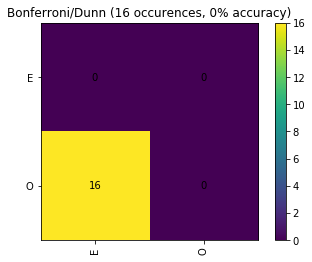

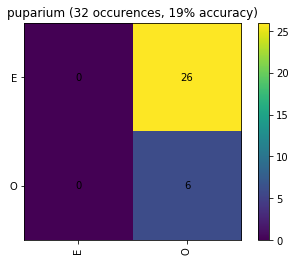

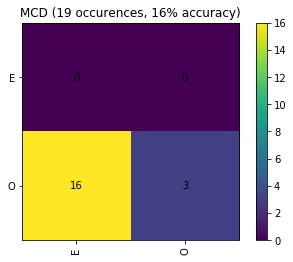

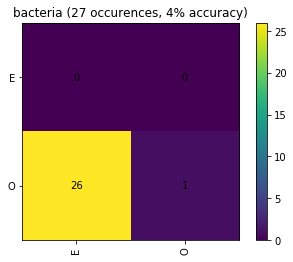

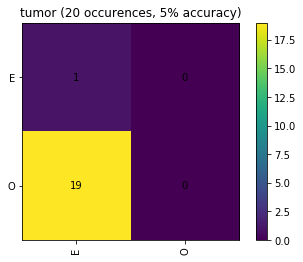

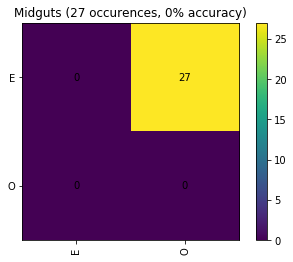

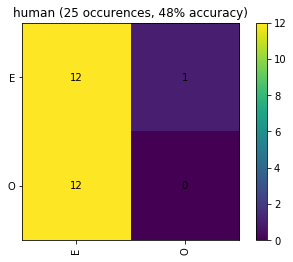

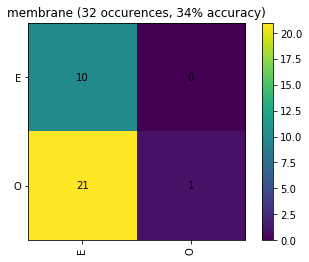

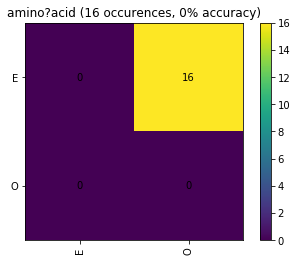

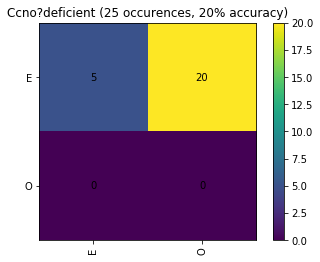

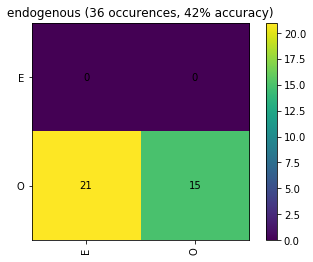

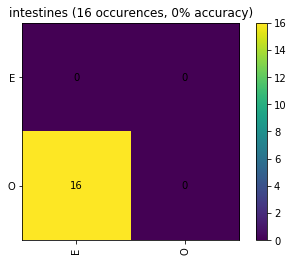

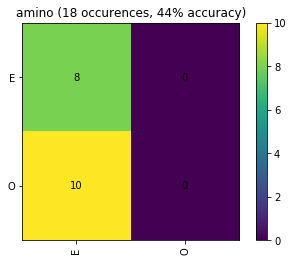

In [32]:
for w in worst_predictions.keys():
    draw_cm(w)